EDA DE 3 DATASETS- CORRELACION

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

# ---------------------------
# 1. Cargar datasets
# ---------------------------
df1 = pd.read_csv("C:/Users/juana/Desktop/liquideuda_project/datasets_clean/merged_registradores.csv")
df2 = pd.read_csv("C:/Users/juana/Desktop/liquideuda_project/datasets_clean/paro_edad_sexo_ca_ine.csv")
df3 = pd.read_csv("C:/Users/juana/Desktop/liquideuda_project/datasets_clean/asalariados_industria_ine.csv")

print("✅ Bases cargadas correctamente")
print("Concursos:", df0.shape, "Paro:", df1.shape, "Asalariados:", df2.shape)

✅ Bases cargadas correctamente
Concursos: (882, 57) Paro: (882, 57) Asalariados: (7560, 7)


In [32]:

# ---------------------------
# 2. Validación rápida
# ---------------------------
def resumen_df(df, nombre):
    print(f"\n📌 {nombre}")
    print(df.head(3))
    print("Dimensiones:", df.shape)
    print("Nulos (%):")
    print((df.isna().sum()/len(df)*100).round(2).sort_values(ascending=False).head(10))

resumen_df(df1, "Concursos (Registradores)")
resumen_df(df2, "Paro (INE)")
resumen_df(df3, "Asalariados (INE)")


# ---------------------------
# 3. Estadísticas descriptivas
# ---------------------------

print("\n📊 Estadísticas de concursos (voluntario/nec/consec):")
print(df1[["t_voluntario","t_necesario","t_consecutivo"]].describe().round(2))

print("\n📊 Estadísticas de paro (tasa_paro):")
print(df2["tasa_paro"].describe().round(2))

print("\n📊 Estadísticas de asalariados (cantidad_flujo):")
print(df3["cantidad_flujo"].describe().round(2))



📌 Concursos (Registradores)
   id_geo___ca comunidad_provincia  s_limitadas  s_anonimas  sotras  \
0          104             Almería          8.0         0.0     0.0   
1          104             Almería         10.0         0.0     0.0   
2          104             Almería         10.0         0.0     0.0   

   personas_fisicas   año  trimestre  t_voluntario  t_necesario  ...  \
0              14.0  2021          1           9.0          0.0  ...   
1              21.0  2021          2          10.0          0.0  ...   
2              19.0  2021          3          12.0          0.0  ...   

   v_entre_5_y_10  v_10_o_mas  sd_y  a_hasta_4  a_entre_5_y_8  a_entre_9_y_12  \
0             1.0         0.0   2.0        1.0            2.0             2.0   
1             2.0         0.0   2.0        3.0            2.0             3.0   
2             0.0         0.0   3.0        3.0            1.0             4.0   

   a_entre_13_y_16  a_entre_17_y_19  a_20_o_mas  comunidad_autonoma  
0 

c:\Users\juana\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


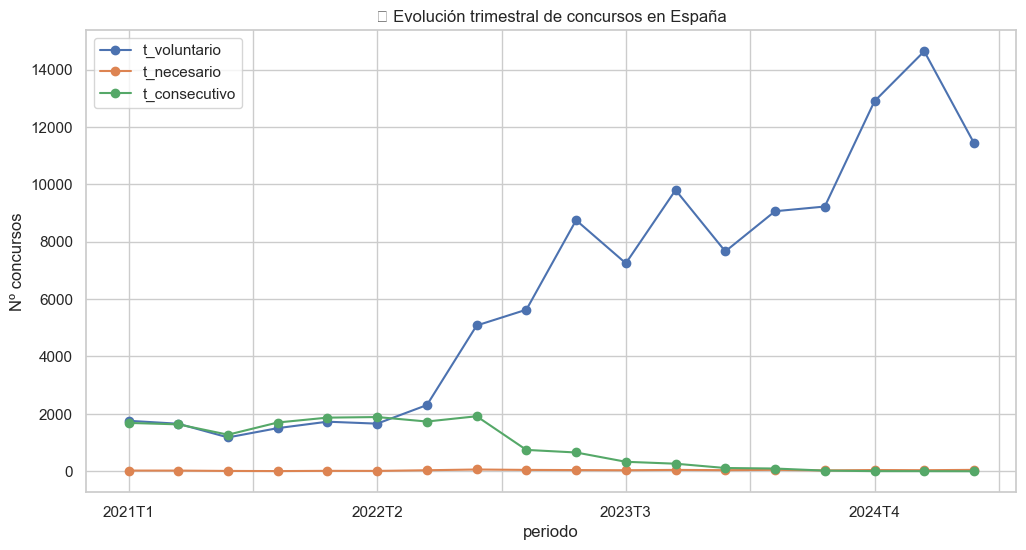

In [33]:
# ---------------------------
# 4. Visualizaciones clave
# ---------------------------

# --- Evolución temporal de concursos ---
df1_time = df1.groupby(["año","trimestre"])[["t_voluntario","t_necesario","t_consecutivo"]].sum().reset_index()
df1_time["periodo"] = df1_time["año"].astype(str) + "T" + df1_time["trimestre"].astype(str)
df1_time.set_index("periodo")[["t_voluntario","t_necesario","t_consecutivo"]].plot(marker="o")
plt.title("📉 Evolución trimestral de concursos en España")
plt.ylabel("Nº concursos")
plt.show()


In [34]:
print("Valores únicos de comunidad_autonoma en df2:")
print(df2["comunidad_autonoma"].unique())

print("\nEjemplo de tasa_paro:")
print(df2["tasa_paro"].head())

print("\nCantidad de NaN en tasa_paro:", df2["tasa_paro"].isna().sum())
print("Cantidad de NaN en comunidad_autonoma:", df2["comunidad_autonoma"].isna().sum())

# Chequeo del groupby
paro_ca = df2.groupby("comunidad_autonoma")["tasa_paro"].mean().sort_values(ascending=False)
print("\nResultado del groupby:")
print(paro_ca.head())


Valores únicos de comunidad_autonoma en df2:
['España' 'Andalucia' 'Aragon' 'Asturias' 'Baleares' 'Canarias'
 'Cantabria' 'Castilla y Leon' 'Castilla La Mancha' 'Cataluña' 'Valencia'
 'Extremadura' 'Galicia' 'Madrid' 'Murcia' 'Navarra' 'Pais Vasco'
 'La Rioja' 'Ceuta' 'Melilla']

Ejemplo de tasa_paro:
0    10.29
1    11.36
2    10.61
3    11.21
4    11.27
Name: tasa_paro, dtype: float64

Cantidad de NaN en tasa_paro: 30
Cantidad de NaN en comunidad_autonoma: 0

Resultado del groupby:
comunidad_autonoma
Ceuta          42.570241
Melilla        40.536538
Extremadura    29.100450
Andalucia      28.366693
Canarias       27.484074
Name: tasa_paro, dtype: float64


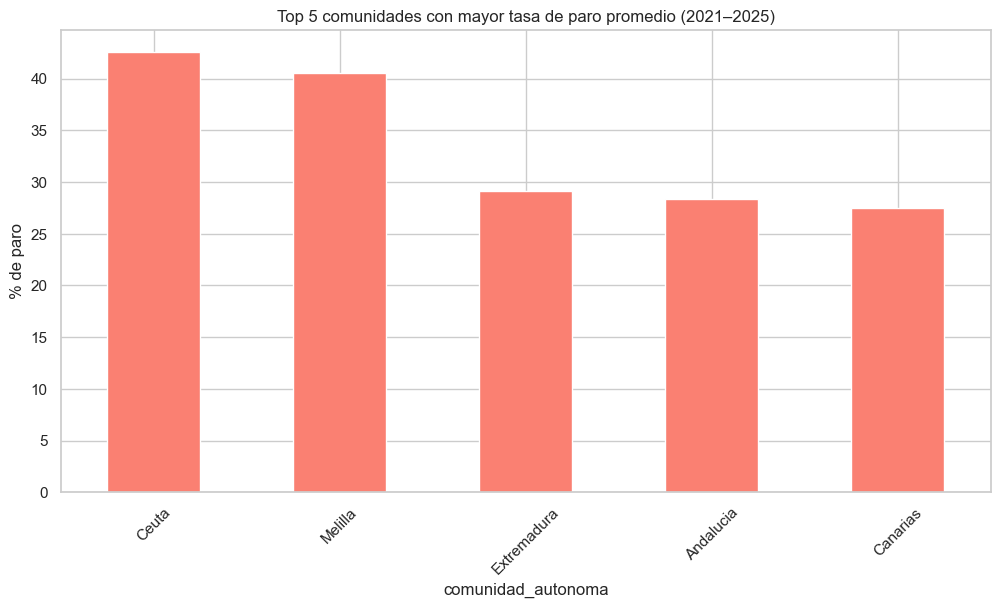

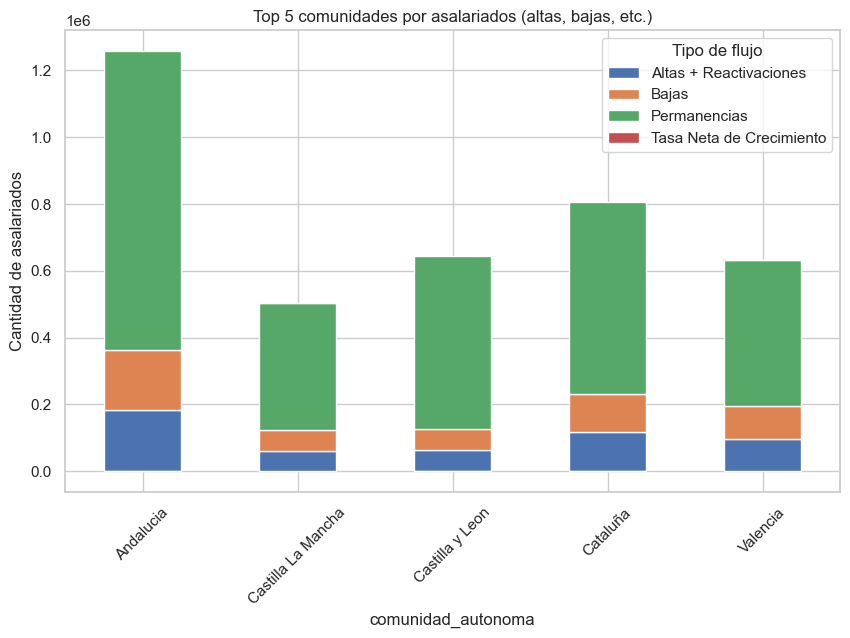

In [40]:

import matplotlib.pyplot as plt

# -----------------------
# 🔹 LIMPIEZA TASA DE PARO
# -----------------------
df2["tasa_paro"] = df2["tasa_paro"].astype(str).str.replace(",", ".", regex=False)
df2["tasa_paro"] = pd.to_numeric(df2["tasa_paro"], errors="coerce")

# Top 5 comunidades por tasa de paro promedio
paro_ca = (
    df2.groupby("comunidad_autonoma")["tasa_paro"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

paro_ca.plot(kind="bar", color="salmon")
plt.title("Top 5 comunidades con mayor tasa de paro promedio (2021–2025)")
plt.ylabel("% de paro")
plt.xticks(rotation=45)
plt.show()

# ----------------------------
# 🔹 ANALISIS ASALARIADOS (DF3)
# ----------------------------
# ----------------------------
# 👷‍♂️ Asalariados por tipo de flujo
# ----------------------------

# Asegurar tipo numérico
df3["cantidad_flujo"] = pd.to_numeric(df3["cantidad_flujo"], errors="coerce")

# Total de asalariados por comunidad (para seleccionar top 5)
top5_comunidades = (
    df3.groupby("comunidad_autonoma")["cantidad_flujo"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filtrar solo esas comunidades
df3_top = df3[df3["comunidad_autonoma"].isin(top5_comunidades)]

# Agrupar por comunidad y tipo de flujo
asalariados_flujo = (
    df3_top.groupby(["comunidad_autonoma", "tipo_flujo"])["cantidad_flujo"]
    .sum()
    .unstack(fill_value=0)
)

# Plot apilado
asalariados_flujo.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Top 5 comunidades por asalariados (altas, bajas, etc.)")
plt.ylabel("Cantidad de asalariados")
plt.xticks(rotation=45)
plt.legend(title="Tipo de flujo")
plt.show()




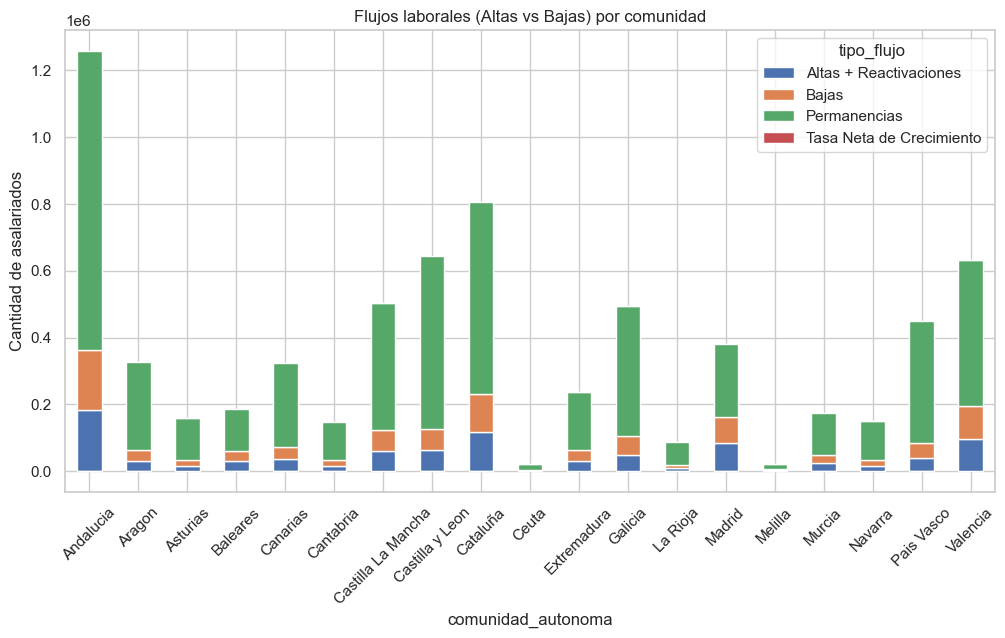

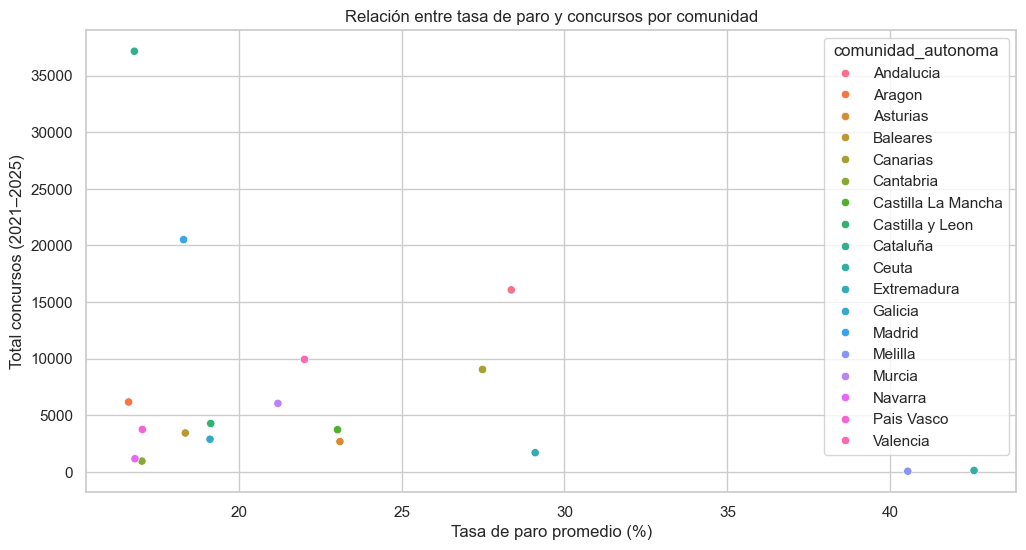

In [ ]:



# --- Cruce estratégico: concursos vs paro ---
df_merge = df1.groupby("comunidad_autonoma")[["t_voluntario","t_necesario","t_consecutivo"]].sum().reset_index()
df_merge["total_concursos"] = df_merge[["t_voluntario","t_necesario","t_consecutivo"]].sum(axis=1)

paro_merge = df2.groupby("comunidad_autonoma")["tasa_paro"].mean().reset_index()

df_merge = df_merge.merge(paro_merge, on="comunidad_autonoma", how="left")

sns.scatterplot(data=df_merge, x="tasa_paro", y="total_concursos", hue="comunidad_autonoma")
plt.title("Relación entre tasa de paro y concursos por comunidad")
plt.xlabel("Tasa de paro promedio (%)")
plt.ylabel("Total concursos (2021–2025)")
plt.show()